In [34]:
import os
import requests
import datetime
import numpy as np
import matplotlib.pyplot as plt
import xarray
import rasterio as rs
from rasterio import plot, mask
from rasterio.features import rasterize
import rioxarray

from shapely import Polygon, LineString

import geopandas as gpd
import pandas as pd

In [76]:
def reproject_raster(src, target_crs):
    '''
    Change crs of imported data
    '''
    
    src_crs = src.crs
    src_transform = src.transform
    src_width = src.width
    src_height = src.height

    # Define the target CRS
    target_crs = target_crs

    # Reproject the raster data to the target CRS
    reprojected_data, dst_transform = rs.warp.reproject(
        source=rs.band(src, 1),
        src_transform=src_transform,
        src_crs=src_crs,
        dst_crs=target_crs,
        resampling=rs.enums.Resampling.nearest)
    
    return reprojected_data, dst_transform, target_crs

In [77]:
# load DEM
file = '../data/SETSM_s2s041_WV03_20201223_104001006473AD00_10400100649D5800_2m_lsf_seg1_dem.tif'
src = rs.open(file)
dem = src.read()
tr = src.transform
src, tr, crs = reproject_raster(src, 'EPSG:3031')

# load ICEsat-2 kmls
kml = gpd.GeoDataFrame.from_file('../shapes/rgt/shackleton_ICESat-2_tracks_cycle22.shp')

In [14]:

# load ICEsat-2 kmls
file = '../shapes/rgt/shackleton_ICESat-2_tracks_cycle22.geojson'
#kml = gpd.GeoDataFrame.from_file(file).set_crs('EPSG:4326').to_crs('EPSG:3031')
gj = gpd.GeoDataFrame.from_file(file).set_crs('EPSG:4326').to_crs('EPSG:3031')

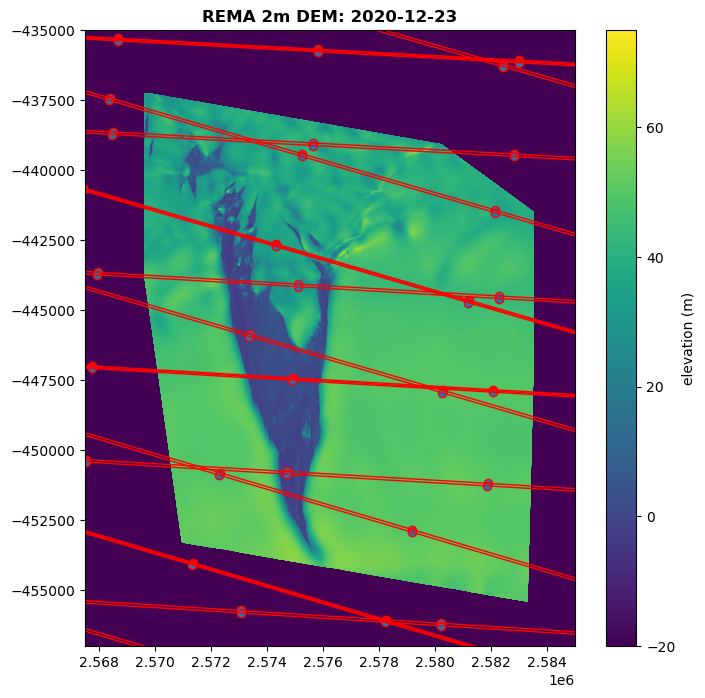

In [154]:
vmin, vmax = -20, 75
titl = 'REMA 2m DEM: 2020-12-23'
xlim = [2.5675e6, 2.5850e6]
ylim = [-457000, -435000]

######################

fig, ax = plt.subplots(figsize=[8, 8])
# has some kwargs but also passes some to plt.imshow()
img = plot.show(src, ax=ax, transform=tr, cmap='viridis', title=titl, vmin=vmin, vmax=vmax, aspect='equal')
ax.set_xlim(xlim)
ax.set_ylim(ylim)

gj.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=1)

sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])

cbar = plt.colorbar(sm, ax=ax, fraction=0.05)
cbar.set_label('elevation (m)')

#line_coords = [[99.755906,-66.298107], [99.771502,-66.242697]]
line_coords_34_gt1r = [[2571164,-445327], [2576914,-446992]]
line_coords_34_gt1r = [[2571164,-445327+200], [2576914,-446992+200]]
line_coords_1185_gt1l = [[2571670.49,-443868.03], [2578631.05,-444278.30]]
x, y = LineString(line_coords_34_gt1r).xy
#ax.plot(x, y, color='white')

x, y = LineString(line_coords_1185_gt1l).xy
#ax.plot(x, y, color='white')

Text(0.5, 1.0, 'REMA 2m DEM: 2020-12-23 sampled along IS2 RGT 34 gt1r')

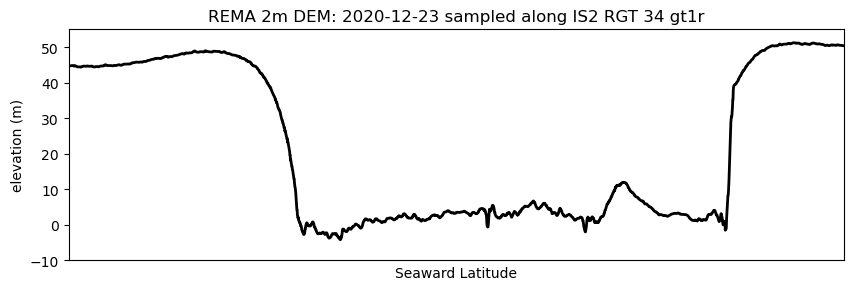

In [151]:
line_coords_34_gt1r = [[2571164,-445327], [2576914,-446992]]

mask = rasterize([LineString(line_coords_34_gt1r)], out_shape=src.shape[1:], transform=tr)
dat = src[0]
track = dat[mask==1]

plt.figure(figsize=[10, 3])
plt.plot(track, color='black', linewidth=2)
plt.ylim([-10, 55])
plt.xlim([0,2900]) 
plt.ylabel('elevation (m)')
plt.xticks([])
plt.xlabel('Seaward Latitude')
plt.title('REMA 2m DEM: 2020-12-23 sampled along IS2 RGT 34 gt1r')

Text(0.5, 1.0, 'REMA 2m DEM: 2020-12-23 sampled along IS2 RGT 1185 gt1l')

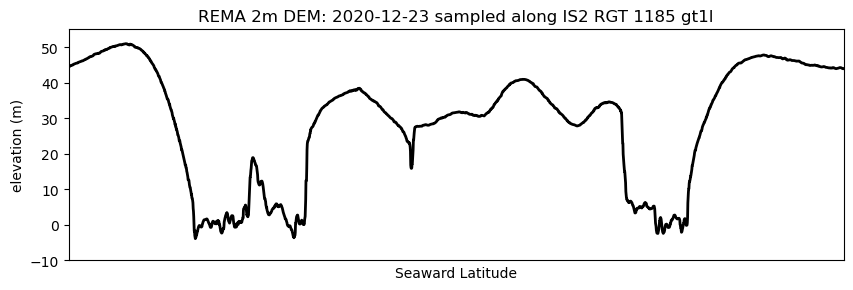

In [146]:
mask = rasterize([LineString(line_coords_1185_gt1l)], out_shape=src.shape[1:], transform=tr)
dat = src[0]
track = dat[mask==1]

plt.figure(figsize=[10, 3])
plt.plot(track, color='black', linewidth=2)
plt.ylim([-10, 55])
plt.xlim([0,2900]) 
plt.ylabel('elevation (m)')
plt.xticks([])
plt.xlabel('Seaward Latitude')
plt.title('REMA 2m DEM: 2020-12-23 sampled along IS2 RGT 1185 gt1l')

(-9.0, 69.0)

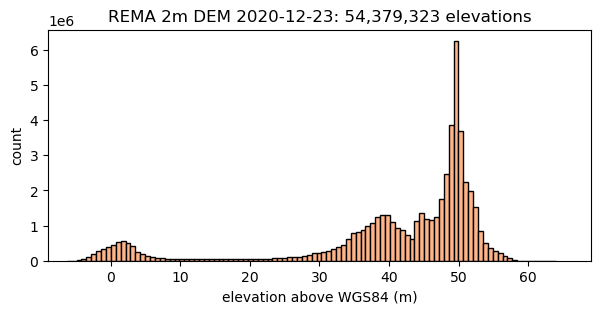

In [153]:
plt.figure(figsize=[7, 3])
length = len(dat[dat>-2000])
plt.hist(np.ndarray.flatten(dat[dat>-2000]), 100, density=False, color='#ffb58a', edgecolor='black')
plt.xlabel('elevation above WGS84 (m)')
plt.ylabel('count')
plt.title(f'REMA 2m DEM 2020-12-23: {length:,} elevations')
plt.xlim([-9, 69])